## Assignment 2 Machine Learning 

### Question 1 (3 points)
SmartRetail’s marketing team is eager to better understand customer behaviour before implementing AI-driven solutions. Currently, the company lacks visibility into how different customer segments interact with its platform. Without these insights, marketing efforts remain inefficient and untargeted. A thorough data exploration process is required to uncover trends, which will form the foundation for segmentation and predictive modelling efforts. Generate visualizations (bar charts, histograms, heatmaps) to detect trends and summarize the main customer spending patterns & engagement trends.

#### Q1.1 - Provide three insights you extracted from the EDA analysis [Free text + code] (3 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("SmartRetail_dataset.csv")
print(df.head())
print(df.info())

# Set up Seaborn for better visuals
sns.set(style="whitegrid")

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [2]:
# List of columns to analyze
cols = [
    'Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Location', 
    'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 
    'Discount Applied', 'Promo Code Used', 'Previous Purchases', 
    'Payment Method', 'Frequency of Purchases', 'Item Purchased'
]

# Iterate over each column and print its unique values
for col in cols:
    unique_values = df[col].unique()
    print(f"Column '{col}' unique values: {unique_values}")

Column 'Age' unique values: [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
Column 'Gender' unique values: ['Male' 'Female']
Column 'Category' unique values: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Column 'Purchase Amount (USD)' unique values: [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]
Column 'Location' unique values: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Neva

Customer ID                  int64
Age                          int64
Gender                       int64
Item Purchased              object
Category                     int64
Purchase Amount (USD)        int64
Location                    object
Size                        object
Color                       object
Season                       int64
Review Rating              float64
Subscription Status          int64
Shipping Type                int64
Discount Applied             int64
Promo Code Used              int64
Previous Purchases           int64
Payment Method               int64
Frequency of Purchases       int64
Age Group                 category
Age Group Encoded            int64
Region                      object
Region_Encoded               int64
dtype: object
   Customer ID  Age  Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1         Blouse         1                     53   
1            2   19       1        Sweater         1      

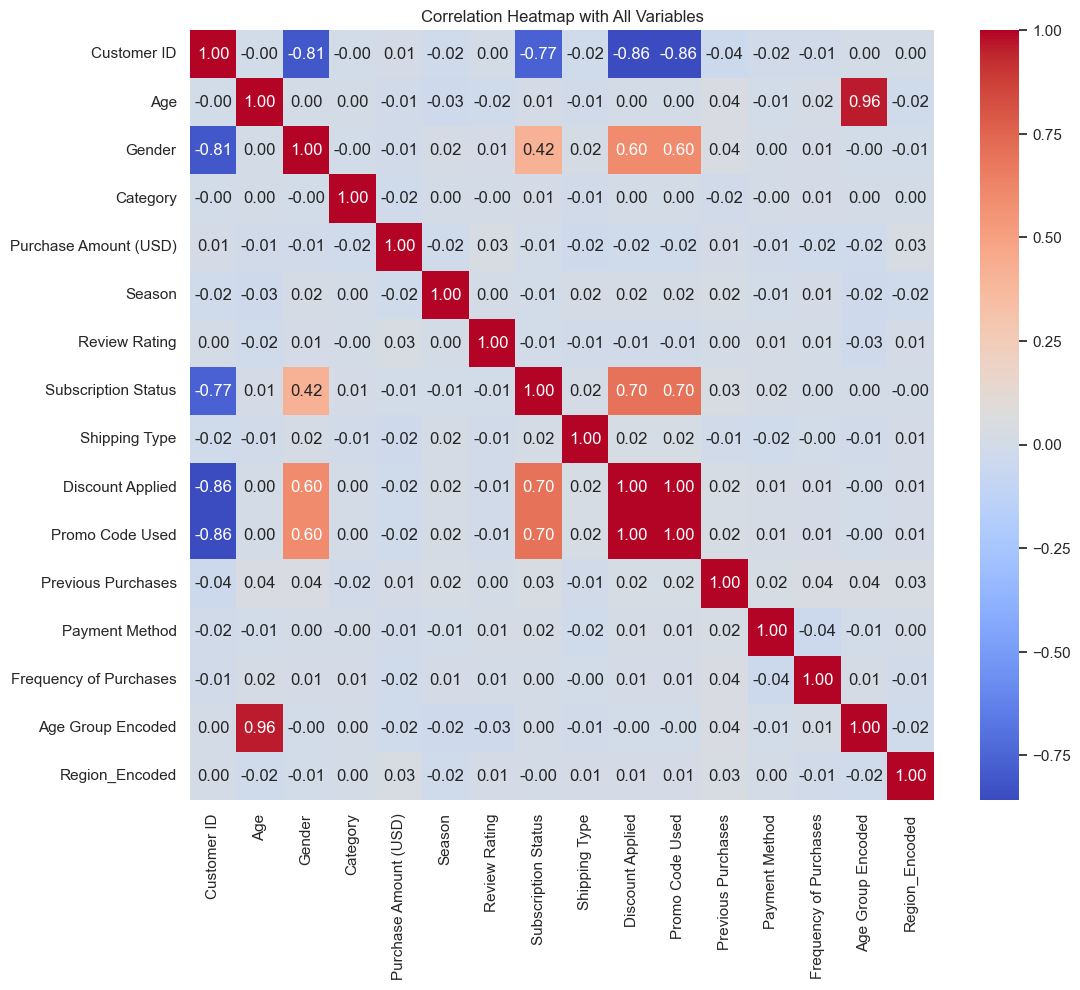

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("SmartRetail_dataset.csv")

# Handle missing values (drop rows with missing values)
df = df.dropna()

# Drop duplicates
df = df.drop_duplicates()

# Encode Yes/No columns into binary (1 for Yes, 0 for No)
yes_no_cols = ['Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode Gender into binary (1 for Male, 0 for Female)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encode Age Group into 4 categories
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 55, 100], labels=['<25', '25-40', '41-55', '56+'])
age_group_mapping = {'<25': 1, '25-40': 2, '41-55': 3, '56+': 4}
df['Age Group Encoded'] = df['Age Group'].map(age_group_mapping)

# Define function to map states to regions
def map_region(state):
    northeast = {'Maine', 'Massachusetts', 'Rhode Island', 'New Hampshire', 'New York',
                 'New Jersey', 'Vermont', 'Pennsylvania', 'Connecticut'}
    south = {'Kentucky', 'Louisiana', 'West Virginia', 'Missouri', 'Arkansas', 'Alabama',
             'Mississippi', 'North Carolina', 'Florida', 'Texas', 'Tennessee', 'Maryland',
             'South Carolina', 'Virginia', 'Georgia', 'Delaware', 'Oklahoma'}
    midwest = {'North Dakota', 'Illinois', 'Indiana', 'Kansas', 'Ohio', 'Nebraska', 'Iowa',
               'South Dakota', 'Minnesota', 'Wisconsin', 'Michigan'}
    west = {'Oregon', 'Wyoming', 'Montana', 'Hawaii', 'California', 'Nevada', 'Colorado',
            'Arizona', 'Alaska', 'New Mexico', 'Idaho', 'Utah', 'Washington'}
    
    if state in northeast:
        return 'Northeast'
    elif state in south:
        return 'South'
    elif state in midwest:
        return 'Midwest'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

# Apply region mapping
if 'Location' in df.columns:
    df['Region'] = df['Location'].apply(map_region)
    region_mapping = {'Northeast': 1, 'South': 2, 'Midwest': 3, 'West': 4}
    df['Region_Encoded'] = df['Region'].map(region_mapping)

# Label encoding for other categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Category', 'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases', 'Age Group Encoded']
for col in categorical_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# List of numerical columns
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Convert columns to numeric (int or float)
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' will convert invalid parsing to NaN
    else:
        print(f"Column '{col}' not found in the dataset.")

# Check the data types to confirm
print(df.dtypes)

print(df.head())

# Heatmap of correlations
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with All Variables")
plt.show()



## Dataset Preprocessing and Encoding Documentation

### Dataset Overview
The dataset contains customer purchase information with the following columns:

| Column Name              | Description |
|--------------------------|-------------|
| Age                      | Customer age (numeric values). |
| Gender                   | Customer gender (Male or Female). |
| Category                 | Product category (Clothing, Footwear, Outerwear, Accessories). |
| Purchase Amount (USD)    | Amount spent on the purchase (numeric values). |
| Location                 | State where the purchase was made (e.g., Kentucky, Maine, etc.). |
| Season                   | Season of the purchase (Winter, Spring, Summer, Fall). |
| Review Rating            | Customer review rating (numeric values between 2.5 and 5.0). |
| Subscription Status      | Whether the customer has a subscription (Yes or No). |
| Shipping Type            | Shipping method used (Express, Free Shipping, Next Day Air, etc.). |
| Discount Applied         | Whether a discount was applied (Yes or No). |
| Promo Code Used         | Whether a promo code was used (Yes or No). |
| Previous Purchases       | Number of previous purchases made by the customer (numeric values). |
| Payment Method           | Payment method used (Venmo, Cash, Credit Card, etc.). |
| Frequency of Purchases   | Frequency of customer purchases (Weekly, Monthly, Annually, etc.). |
| Customer ID              | Unique identifier for each customer. |
| Item Purchased           | The specific item purchased by the customer. |
| Size                     | Size of the purchased item. |
| Color                    | Color of the purchased item. |

### Preprocessing Steps

#### 1. Handling Missing Values
Rows with missing values were dropped to ensure data quality.

#### 2. Dropping Duplicates
Duplicate rows were removed to avoid redundancy in the dataset.

### Encoding and Transformations

#### 1. Binary Encoding for Yes/No Columns
The following columns were encoded into binary values (1 for Yes, 0 for No):
- Subscription Status
- Discount Applied
- Promo Code Used

#### 2. Binary Encoding for Gender
- 1 for Male
- 0 for Female

#### 3. Age Group Encoding
The Age column was binned into 4 categories and encoded as follows:
- <25 → 1
- 25-40 → 2
- 41-55 → 3
- 56+ → 4

#### 4. Region Encoding
The Location column was mapped to 4 regions and encoded as follows:
- Northeast → 1
- South → 2
- Midwest → 3
- West → 4

#### 5. Label Encoding for Categorical Columns
The following categorical columns were label-encoded using `LabelEncoder`:
- Category
- Season
- Shipping Type
- Payment Method
- Frequency of Purchases
- Age Group Encoded

#### 6. Numerical Columns
The following columns were converted to numeric types:
- Age
- Purchase Amount (USD)
- Review Rating
- Previous Purchases

### Encoded Values Reference

#### 1. Gender
| Encoded Value | Original Value |
|--------------|---------------|
| 1            | Male          |
| 0            | Female        |

#### 2. Subscription Status, Discount Applied, Promo Code Used
| Encoded Value | Original Value |
|--------------|---------------|
| 1            | Yes           |
| 0            | No            |

#### 3. Age Group
| Encoded Value | Original Value |
|--------------|---------------|
| 1            | <25           |
| 2            | 25-40         |
| 3            | 41-55         |
| 4            | 56+           |

#### 4. Region
| Encoded Value | Original Value |
|--------------|---------------|
| 1            | Northeast     |
| 2            | South         |
| 3            | Midwest       |
| 4            | West          |

#### 5. Category
| Encoded Value | Original Value |
|--------------|---------------|
| 0            | Clothing      |
| 1            | Footwear      |
| 2            | Outerwear     |
| 3            | Accessories   |

#### 6. Season
| Encoded Value | Original Value |
|--------------|---------------|
| 0            | Winter        |
| 1            | Spring        |
| 2            | Summer        |
| 3            | Fall          |

#### 7. Shipping Type
| Encoded Value | Original Value |
|--------------|---------------|
| 0            | Express       |
| 1            | Free Shipping |
| 2            | Next Day Air  |
| 3            | Standard      |
| 4            | Store Pickup  |
| 5            | 2-Day Shipping |

#### 8. Payment Method
| Encoded Value | Original Value |
|--------------|---------------|
| 0            | Venmo         |
| 1            | Cash          |
| 2            | Credit Card   |
| 3            | PayPal        |
| 4            | Bank Transfer |
| 5            | Debit Card    |

#### 9. Frequency of Purchases
| Encoded Value | Original Value |
|--------------|---------------|
| 0            | Fortnightly   |
| 1            | Weekly        |
| 2            | Annually      |
| 3            | Quarterly     |
| 4            | Bi-Weekly     |
| 5            | Monthly       |
| 6            | Every 3 Months |

### Summary of Preprocessing and Encoding
- **Handled Missing Values**: Dropped rows with missing values.
- **Dropped Duplicates**: Removed duplicate rows.
- **Binary Encoding**: Applied to Gender, Subscription Status, Discount Applied, and Promo Code Used.
- **Age Group Encoding**: Binned and encoded into 4 categories.
- **Region Encoding**: Mapped states to 4 regions and encoded.
- **Label Encoding**: Applied to Category, Season, Shipping Type, Payment Method, Frequency of Purchases, and Age Group Encoded.
- **Numerical Conversion**: Converted Age, Purchase Amount (USD), Review Rating, and Previous Purchases to numeric types.

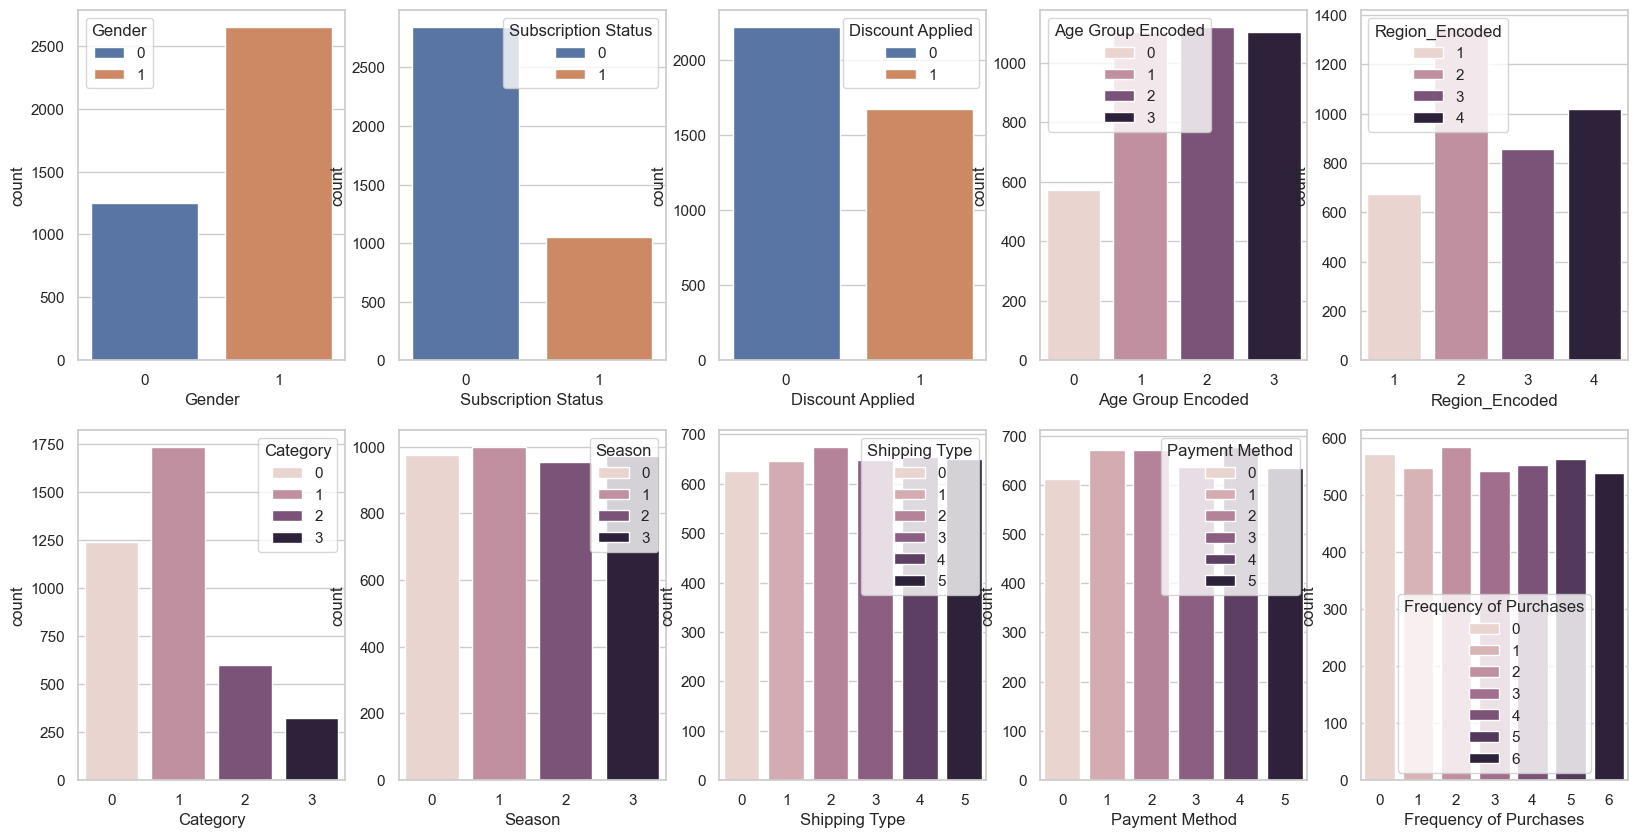

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns for count plots
for_plotting = ['Gender', 'Subscription Status', 'Discount Applied', 
        'Age Group Encoded', 'Region_Encoded', 'Category', 'Season', 
        'Shipping Type', 'Payment Method', 'Frequency of Purchases']


# Create subplots for count plots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Loop through categorical columns and create count plots
for i in range(len(for_plotting)):
    sns.countplot(x=for_plotting[i],
                  hue=for_plotting[i], data=df,
                  ax=axes[i])
    axes[i]

Text(0.5, 1.0, 'Distribution of number of purchases\xa0made')

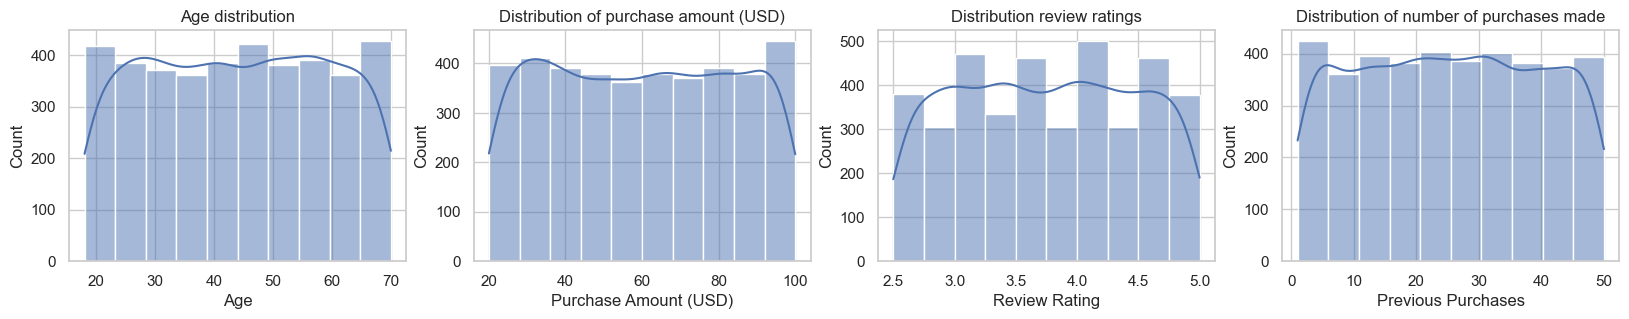

In [5]:
 ig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes = axes.flatten()
sns.histplot(df, x = "Age",bins=10, kde=True, ax=axes[0])
axes[0].set_title('Age distribution')
sns.histplot(df, x = "Purchase Amount (USD)",bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of purchase amount (USD)')
sns.histplot(df, x = "Review Rating",bins=10, kde=True, ax=axes[2])
axes[2].set_title('Distribution review ratings')
sns.histplot(df, x = "Previous Purchases",bins=10, kde=True, ax=axes[3])
axes[3].set_title('Distribution of number of purchases made')

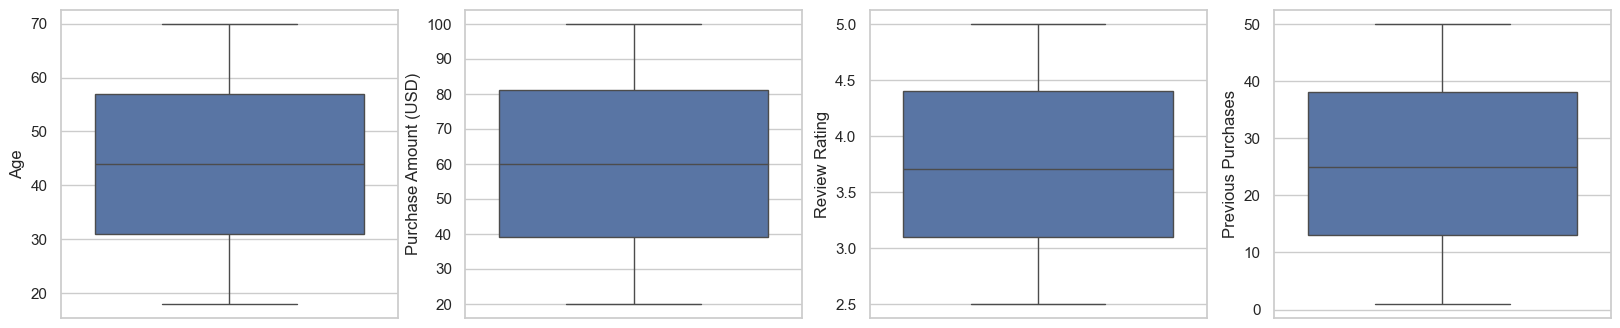

In [6]:
ig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.flatten()
boxplots = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for i in range(len(boxplots)):
    sns.boxplot(data=df[boxplots[i]], ax=axes[i])

### 1. Gender Distribution
Insight: The dataset shows a 2:1 ratio of males to females.

Males make up approximately 2/3 of the customers.

Females make up approximately 1/3 of the customers.

Implication: Marketing strategies could be tailored to target male customers more effectively, as they represent the majority of the customer base.

### 2. Subscription Status Distribution
Insight: The subscription status distribution is also 2:1.

Approximately 2/3 of customers have a subscription.

Approximately 1/3 of customers do not have a subscription.

Implication: Since a significant portion of customers are subscribers, SmartRetail should focus on retaining these customers and potentially converting non-subscribers through targeted campaigns.

### 3. Discount and Promo Code Usage
Insight: The Discount Applied and Promo Code Used features are perfectly correlated (correlation coefficient = 1.00).

This means that customers who use discounts also use promo codes, and vice versa.

Implication: There is no need to keep both features in the dataset. One of them can be dropped to reduce redundancy and simplify the analysis.

#### Additional Observation
The dataset is mostly uniformly distributed across variables. This suggests that SmartRetail has a balanced customer base across most variables.

### Question 2 (6 points)
SmartRetail’s marketing team recognizes that different customer groups have distinct shopping behaviors, preferences, and spending habits. By continuing with a one-size-fits-all marketing approach, the company risks alienating high-value customers while overspending on ineffective promotions for low-value segments. The goal is to identify actionable customer segments that will allow SmartRetail to tailor its marketing campaigns for maximum impact.

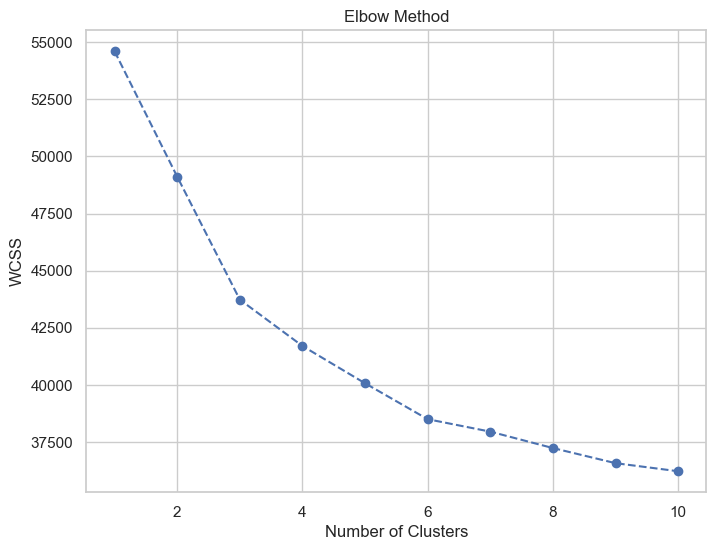

Silhouette Score for 2 clusters: 0.0968
Silhouette Score for 3 clusters: 0.1134
Silhouette Score for 4 clusters: 0.0987
Silhouette Score for 5 clusters: 0.0911
Silhouette Score for 6 clusters: 0.0904
Silhouette Score for 7 clusters: 0.0798
Silhouette Score for 8 clusters: 0.0845
Silhouette Score for 9 clusters: 0.0834
Silhouette Score for 10 clusters: 0.0746


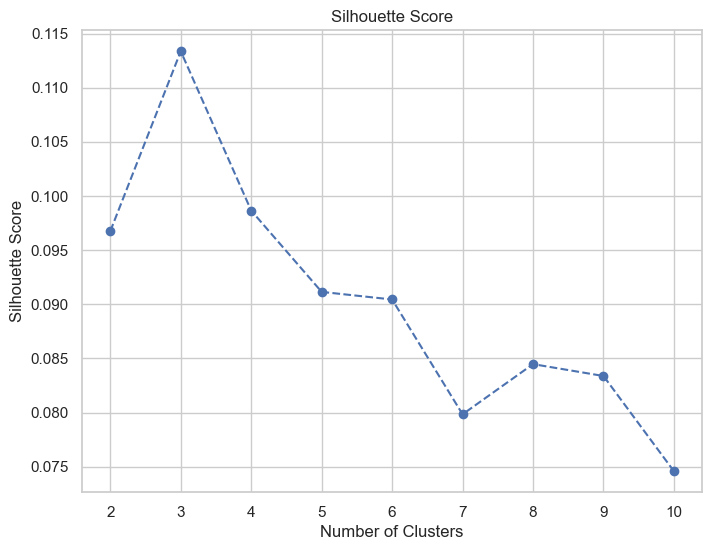

Number of customers in each cluster (K-Means):
Cluster_KMeans
0    1614
1    1233
2    1053
Name: count, dtype: int64


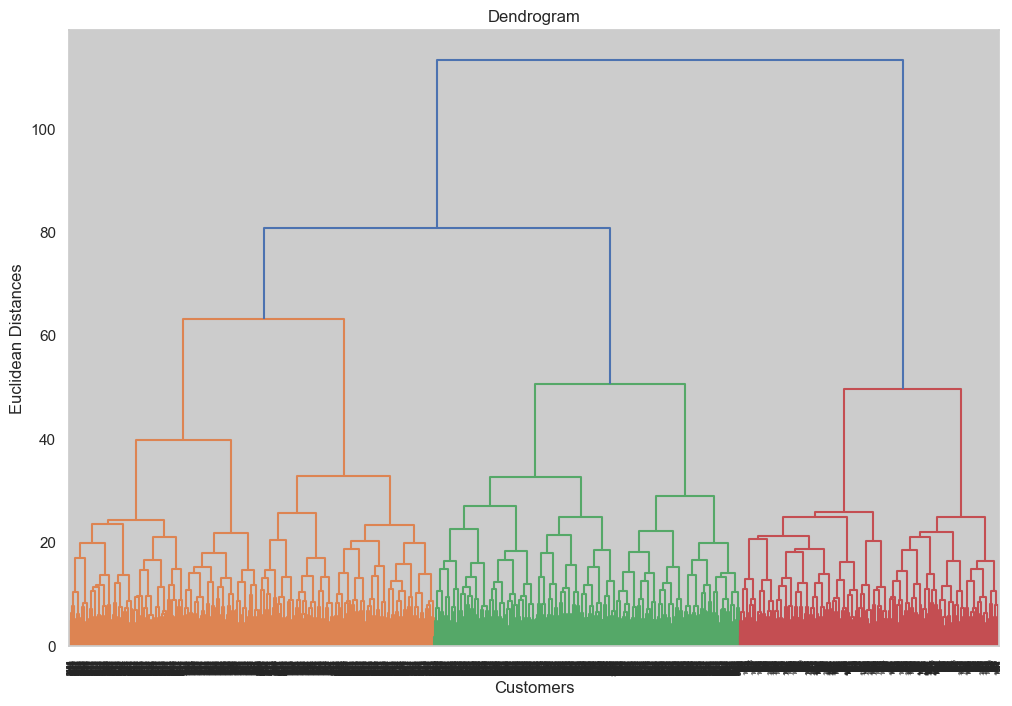

Number of customers in each cluster (Hierarchical):
Cluster_Hierarchical
0    1531
2    1280
1    1089
Name: count, dtype: int64


In [7]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select features for clustering
# Use numerical and encoded features (excluding target variables or irrelevant columns)
X = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 
        'Gender', 'Subscription Status', 'Discount Applied', 
        'Age Group Encoded', 'Region_Encoded', 'Category', 'Season', 
        'Shipping Type', 'Payment Method', 'Frequency of Purchases']]

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# K-Means Clustering
# --------------------------

# Elbow Method to Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score for Validation
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {i} clusters: {silhouette_avg:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-Means Clustering with Optimal Number of Clusters
optimal_clusters_kmeans = 3  # Optimal number of clusters from the elbow method and silhouette score
kmeans = KMeans(n_clusters=optimal_clusters_kmeans, init='k-means++', random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Print the number of customers in each cluster (K-Means)
print("Number of customers in each cluster (K-Means):")
print(df['Cluster_KMeans'].value_counts())

# --------------------------
# Hierarchical Clustering
# --------------------------

# Create a dendrogram to determine the optimal number of clusters
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# Apply Agglomerative Clustering
optimal_clusters_hierarchical = 3 #optimal number of clusters from the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_hierarchical, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = agg_clustering.fit_predict(X_scaled)

# Print the number of customers in each cluster (Hierarchical)
print("Number of customers in each cluster (Hierarchical):")
print(df['Cluster_Hierarchical'].value_counts())

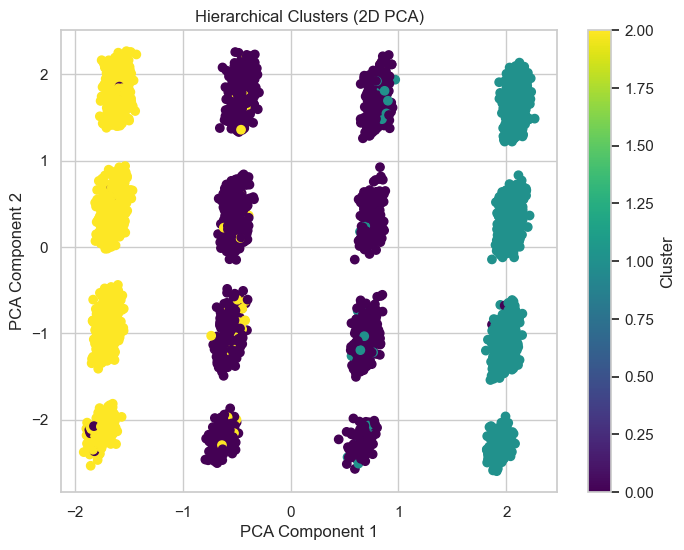

In [8]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Hierarchical'], cmap='viridis', marker='o')
plt.title('Hierarchical Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### Q2.1. Please provide the number of customers segments. [Free text + code] (3 points)

Both clustering methods resulted in 3 customer segments.

- Elbow Method & Silhouette Score: 
The elbow method plot shows an elbow at the 3rd cluster.

- Dendrogram: 
The dendrogram shows distinct clusters, we can see that 3 clusters are recommmanded by the dendrogram.

#### Q2.2. Are the customers segments well defined? How did you measure it? [Free text + code] (1.5 points)

The customer segments are not well-defined. Here’s how we measured it:

- Silhouette Score: 
The silhouette scores are quite low: The highest silhouette score is 0.1134 for 3 clusters, which is what I decided to select. However, a silhouette score close to 0 indicates that clusters are overlapping, and the separation between clusters is not clear.

- PCA Plot: 
The PCA plot shows overlapping clusters aswell, which suggests that the segments are not well-separated in the reduced-dimensional space.

#### Q2.3. Interpret the customer segments [Free text] (1.5 points)

In [9]:
# Cluster Profiling for K-Means Clusters
cluster_profile_kmeans = df.groupby('Cluster_KMeans')[['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age', 'Gender', 'Subscription Status', 'Discount Applied']].mean()
print("K-Means Cluster Profiles:")
print(cluster_profile_kmeans)

# Cluster Profiling for Hierarchical Clusters
cluster_profile_hierarchical = df.groupby('Cluster_Hierarchical')[['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Age', 'Gender', 'Subscription Status', 'Discount Applied']].mean()
print("\nHierarchical Cluster Profiles:")
print(cluster_profile_hierarchical)

K-Means Cluster Profiles:
                Purchase Amount (USD)  Review Rating  Previous Purchases  \
Cluster_KMeans                                                             
0                           59.703841       3.728129           25.476456   
1                           60.076237       3.784915           24.562044   
2                           59.491928       3.742450           26.084520   

                      Age    Gender  Subscription Status  Discount Applied  
Cluster_KMeans                                                              
0               55.459727  0.556382                  0.0          0.210657  
1               29.018654  0.568532                  0.0          0.230333  
2               44.230769  1.000000                  1.0          1.000000  

Hierarchical Cluster Profiles:
                      Purchase Amount (USD)  Review Rating  \
Cluster_Hierarchical                                         
0                                 59.893534       3.

# Cluster Interpretation

While the segments are not well-defined, we can still attempt to interpret them based on the clustering results. Here’s a general interpretation:

## K-Means Clusters

### Cluster 0 (Size: 41.38% of customers)
- **Label**: **"Non-Subscribed Older Mix Gender"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 59.70 (moderate)
  - **Review Rating**: 3.73 (high)
  - **Previous Purchases**: 25.48 (high)
  - **Age**: 55.46 (older demographic)
  - **Gender**: 55.64% Male (`Gender = 0.56`)
  - **Subscription Status**: None subscribed (`Subscription Status = 0.0`)
  - **Discount Applied**: 21.07% use discounts.
- **Interpretation**: Older customers who shop frequently but do not subscribe. They occasionally use discounts. Encourage them to subscribe or take advantage of promotions.

### Cluster 1 (Size: 31.62% of customers)
- **Label**: **"Non-Subscribed Young Mixed Gender"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 60.08 (moderate)
  - **Review Rating**: 3.78 (high)
  - **Previous Purchases**: 24.56 (moderate)
  - **Age**: 29.02 (younger demographic)
  - **Gender**: 56.85% Male, 43.15% Female (`Gender = 0.57`)
  - **Subscription Status**: None subscribed (`Subscription Status = 0.0`)
  - **Discount Applied**: 23.03% use discounts.
- **Interpretation**: Younger customers with mixed gender who shop moderately but do not subscribe. They occasionally use discounts. Target them with personalized offers.

### Cluster 2 (Size: 27.00% of customers)
- **Label**: **"Subscribed Middle-Aged Males"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 59.49 (moderate)
  - **Review Rating**: 3.74 (high)
  - **Previous Purchases**: 26.08 (high)
  - **Age**: 44.23 (middle-aged demographic)
  - **Gender**: All Male (`Gender = 1.0`)
  - **Subscription Status**: All subscribed (`Subscription Status = 1.0`)
  - **Discount Applied**: Always use discounts (`Discount Applied = 1.0`).
- **Interpretation**: Middle-aged male customers who are highly loyal, subscribed, and always use discounts. Reward them with exclusive perks and loyalty programs.

---

## Hierarchical Clusters

### Cluster 0 (Size: 39.26% of customers)
- **Label**: **"Non-Subscribed Middle-Aged Males"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 59.89 (moderate)
  - **Review Rating**: 3.76 (high)
  - **Previous Purchases**: 25.01 (high)
  - **Age**: 44.06 (middle-aged demographic)
  - **Gender**: 1.44% Female, 98.56% Male (`Gender = 0.99`)
  - **Subscription Status**: None subscribed (`Subscription Status = 0.0`)
  - **Discount Applied**: 38.08% use discounts.
- **Interpretation**: Middle-aged customers, predominantly female, who shop frequently but do not subscribe or use discounts. Encourage them to subscribe or take advantage of promotions.

### Cluster 1 (Size: 27.92% of customers)
- **Label**: **"Subscribed Middle-Aged Males"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 59.34 (moderate)
  - **Review Rating**: 3.74 (high)
  - **Previous Purchases**: 26.16 (high)
  - **Age**: 44.16 (middle-aged demographic)
  - **Gender**: All Male (`Gender = 1.0`)
  - **Subscription Status**: 96.51% subscribed (`Subscription Status = 0.97`)
  - **Discount Applied**: Always use discounts (`Discount Applied = 1.0`).
- **Interpretation**: Middle-aged male customers who are highly loyal, subscribed, and always use discounts. Reward them with exclusive perks and loyalty programs.

### Cluster 2 (Size: 32.82% of customers)
- **Label**: **"Non-Subscribed Young Females"**
- **Characteristics**:
  - **Purchase Amount (USD)**: 59.97 (moderate)
  - **Review Rating**: 3.75 (high)
  - **Previous Purchases**: 25.07 (moderate)
  - **Age**: 43.99 (middle-aged demographic)
  - **Gender**: 4.22% Male, 95.78% Female (`Gender = 0.04`)
  - **Subscription Status**: None subscribed (`Subscription Status = 0.0`)
  - **Discount Applied**: 0.39% use discounts.
- **Interpretation**: Younger male customers who shop moderately but do not subscribe. They occasionally use discounts. Target them with personalized offers.

---

## Summary

While the segments are not well-defined, the clustering results provide insights into customer behaviors. The key segments are more interesting with the Hierarchical Clusters, with further differentiation based on subscription status, discount applied and gender. These interpretations can guide targeted marketing strategies.

#### Q3.1. Develop two models to answer the company need. Why did you choose those models? [Free text + code] (3 points)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       558
           1       0.64      0.86      0.73       222

    accuracy                           0.82       780
   macro avg       0.79      0.83      0.80       780
weighted avg       0.85      0.82      0.83       780


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       558
           1       0.66      0.81      0.73       222

    accuracy                           0.83       780
  

c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       558
           1       0.64      0.75      0.69       222

    accuracy                           0.81       780
   macro avg       0.77      0.79      0.78       780
weighted avg       0.82      0.81      0.81       780


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       558
           1       0.64      0.91      0.75       222

    accuracy                           0.83       780
   macro avg       0.80      0.85      0.81       780
weighted avg       0.87      0.83      0.84       780



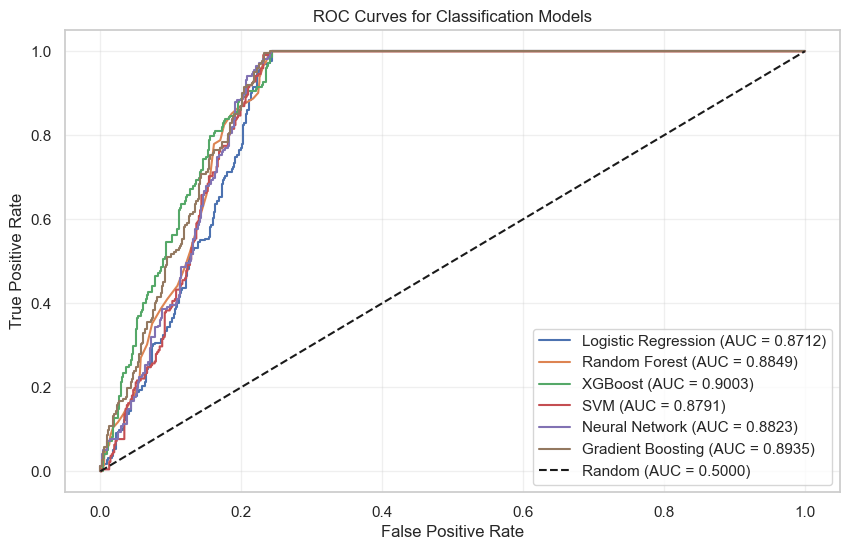


Summary of All Metrics:
                     accuracy  precision  recall  f1_score     auc  log_loss
Logistic Regression    0.8256     0.6201  1.0000    0.7655  0.8712    0.3088
Random Forest          0.8218     0.6379  0.8649    0.7342  0.8849    0.3170
XGBoost                0.8282     0.6618  0.8108    0.7287  0.9003    0.3219
SVM                    0.8295     0.6268  0.9910    0.7679  0.8791    0.3296
Neural Network         0.8090     0.6409  0.7477    0.6902  0.8823    0.3726
Gradient Boosting      0.8282     0.6384  0.9144    0.7519  0.8935    0.3055


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    log_loss,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def evaluate_classification_metrics(y_true, y_pred, y_prob=None, model_name="Model"):
    """
    Evaluates a classification model using multiple metrics.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    y_prob : array-like, optional
        Predicted probabilities for the positive class
    model_name : str, optional
        Name of the model for display purposes
    
    Returns:
    --------
    dict
        Dictionary containing all computed metrics
    """
    metrics = {}
    
    # Basic classification metrics
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred, average='binary')
    metrics['recall'] = recall_score(y_true, y_pred, average='binary')
    metrics['f1_score'] = f1_score(y_true, y_pred, average='binary')
    
    # Regression-like metrics (treating 0/1 as continuous)
    metrics['mae'] = mean_absolute_error(y_true, y_pred)
    metrics['mse'] = mean_squared_error(y_true, y_pred)
    metrics['rmse'] = np.sqrt(metrics['mse'])
    
    # Avoid division by zero in MAPE calculation
    metrics['mape'] = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 0.001))) * 100
    metrics['r2'] = r2_score(y_true, y_pred)
    
    # ROC and AUC (requires probability predictions)
    if y_prob is not None:
        metrics['log_loss'] = log_loss(y_true, y_prob)
        
        # ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        metrics['roc_curve'] = (fpr, tpr)
        metrics['auc'] = auc(fpr, tpr)
    
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred))
    
    return metrics

def plot_roc_curve(metrics_dict, figsize=(10, 6)):
    """
    Plot ROC curves for multiple models.
    
    Parameters:
    -----------
    metrics_dict : dict
        Dictionary where keys are model names and values are metric dictionaries
    figsize : tuple, optional
        Figure size
    """
    plt.figure(figsize=figsize)
    
    for model_name, metrics in metrics_dict.items():
        if 'roc_curve' in metrics and 'auc' in metrics:
            fpr, tpr = metrics['roc_curve']
            auc_score = metrics['auc']
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5000)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Classification Models')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# X = features, y = target (Subscription Status)
# Selecting features
X = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender', 'Discount Applied', 'Age Group Encoded', 'Region_Encoded', 'Category', 'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases']]
y = df['Subscription Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store our models
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), X_train_scaled, X_test_scaled),
    'Random Forest': (RandomForestClassifier(random_state=42), X_train, X_test),
    'XGBoost': (XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42), X_train, X_test),
    'SVM': (SVC(probability=True, random_state=42), X_train_scaled, X_test_scaled),
    'Neural Network': (MLPClassifier(max_iter=500, random_state=42), X_train_scaled, X_test_scaled),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), X_train, X_test)
}

# Train models and evaluate
trained_models = {}
all_metrics = {}

for name, (model, X_tr, X_te) in models.items():
    
    # Train the model
    model.fit(X_tr, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]
    
    # Evaluate
    metrics = evaluate_classification_metrics(y_test, y_pred, y_prob, name)
    all_metrics[name] = metrics

# Plot ROC curves
plot_roc_curve(all_metrics)

# Create a summary table of all metrics
summary_df = pd.DataFrame({
    model_name: {
        metric: value for metric, value in metrics.items() 
        if metric != 'roc_curve'  # Exclude the ROC curve points
    }
    for model_name, metrics in all_metrics.items()
})

# Transpose to have models as columns and metrics as rows
summary_df = summary_df.T
# Keep only numeric metrics for the table
numeric_metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc', 'log_loss']
summary_df = summary_df[numeric_metrics]
    
print("\nSummary of All Metrics:")
print(summary_df.round(4))

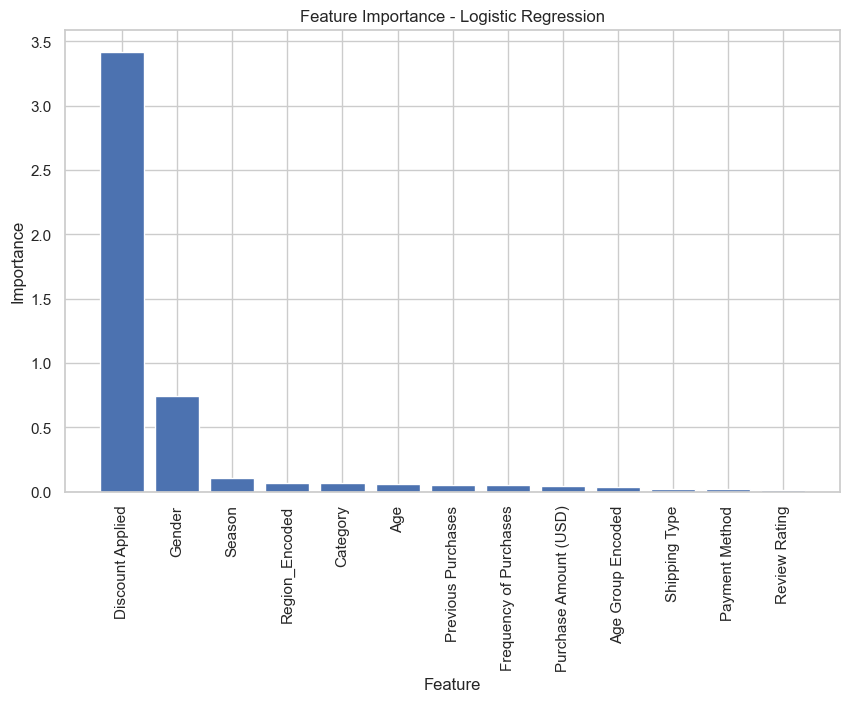

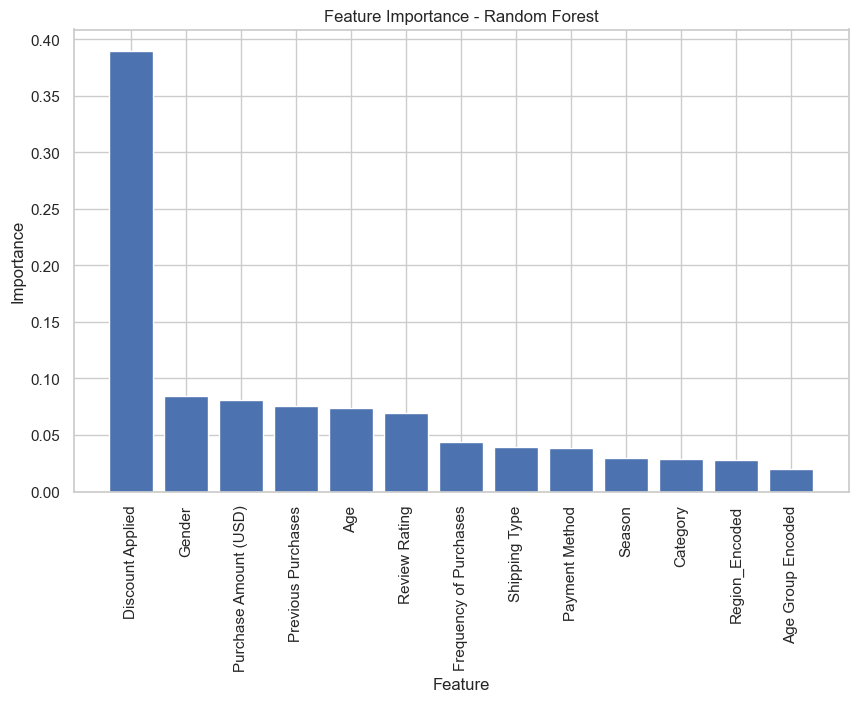

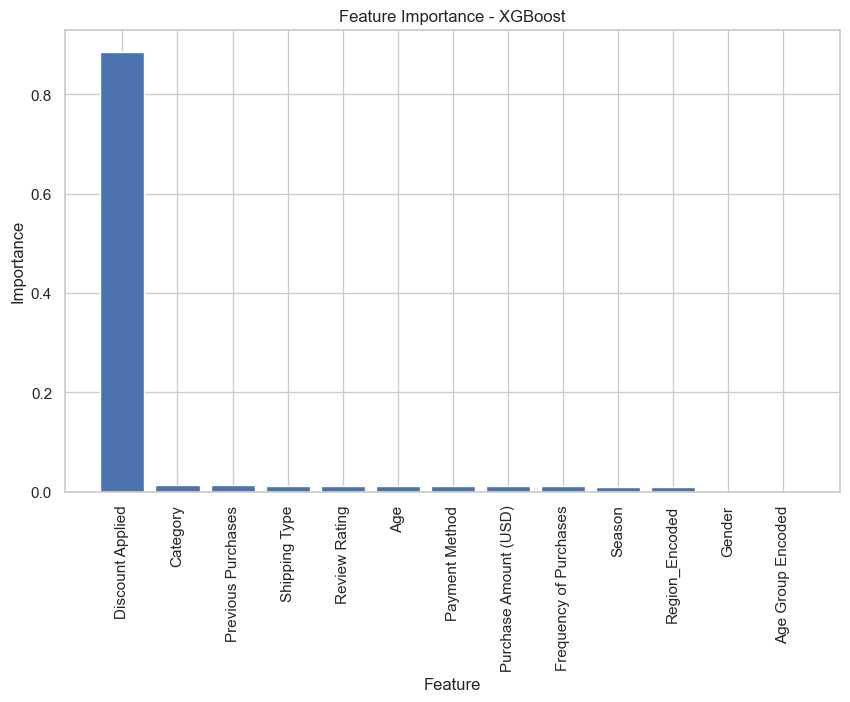

No feature importance available for Feature Importance - SVM
No feature importance available for Feature Importance - Neural Network


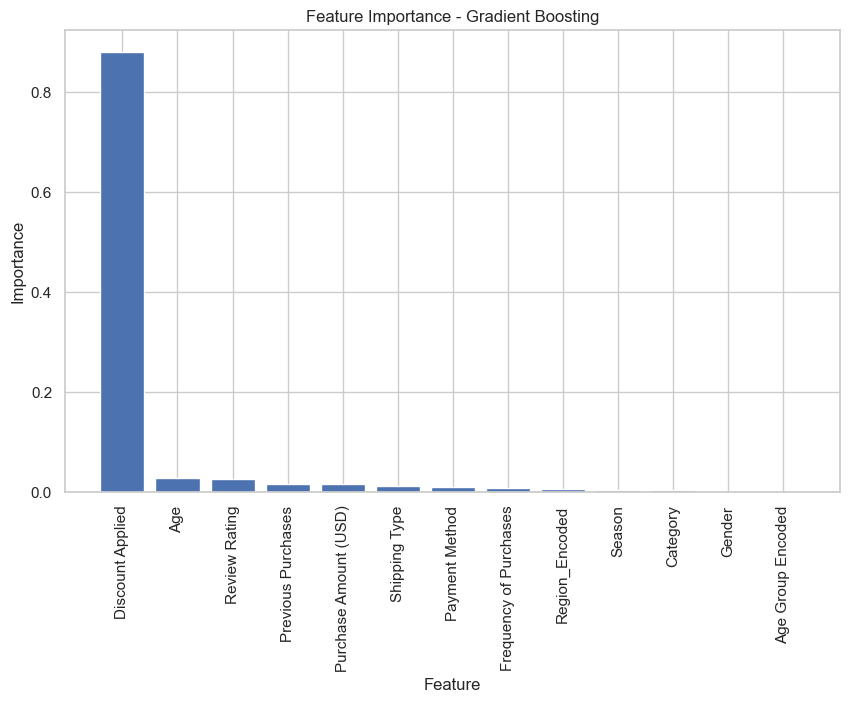

In [11]:
def plot_feature_importance(model, feature_names, title):
    """
    Plots feature importance for models that support it.
    
    Parameters:
    -----------
    model : trained model
        The trained model (e.g., RandomForest, XGBoost, LogisticRegression).
    feature_names : list or pandas Index
        Names of the features (columns) in the dataset.
    title : str
        Title for the plot.
    """
    # Check if the model has feature importances or coefficients
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # Use absolute values for coefficients
    else:
        print(f"No feature importance available for {title}")
        return

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

for name, model in trained_models.items():
    plot_feature_importance(model, feature_names=X.columns, title=f"Feature Importance - {name}")

# Feature Importance Analysis

The analysis of feature importance reveals some interesting and unexpected patterns in the dataset:

## Key Findings

### 1. **Customer ID Dominates Predictions**
- When **Customer ID** is included, models perform extremely well across all metrics. 
- It becomes the strongest predictor, showing a strong negative correlation with **Subscription Status**, **Promo Code Used**, and **Discount Applied**.
- This suggests **Customer ID** has an outsized influence on the model's performance in this dataset.

### 2. **Promo Code and Discount Features**
- Including **Promo Code Used** or **Discount Applied** also improves model performance, though not as much as **Customer ID**.
- When **Customer ID** is excluded, **Discount Applied** becomes the most important feature, followed by **Gender** for XGBoost and Random Forest.
- Models perform decently in this case, with high **recall** but lower **precision**.

### 3. **Excluding Key Features**
- Without **Promo Code Used** or **Discount Applied**, model performance drops significantly.
- **Gender** appears to gain importance, but this is likely artificial. The dataset seems structured in a way that **Gender** changes from "Male" to "Female" at a specific point, creating a misleading pattern.
- If **Gender** is also excluded, models perform poorly, with **ROC-AUC scores below 0.5** (worse than random guessing). Feature importance then varies by model, indicating a lack of meaningful patterns.

### 4. **Artificial Dataset Structure**
- The dataset seems artificially designed, with **Customer ID** playing an unusually large role. In real-world scenarios, **Customer ID** would not be used as a feature since it’s just a unique identifier with no predictive power.
- This artificial design makes it hard to identify real patterns, as **Customer ID** overshadows other features.

### 5. **Real-World Implications**
- In practice:
  - **Customer ID** should never be included in predictive models, as it has no real-world predictive value.
  - **Discount Applied** could be useful, but its inclusion should be validated to avoid overfitting. If used, it often becomes the most important feature, making models overly dependent on it.

---

## Summary
- **Customer ID** dominates the dataset, but its importance is artificial.
- **Promo Code Used** and **Discount Applied** are strong predictors but are overshadowed by **Customer ID**.
- **Gender** gains artificial importance due to dataset structure, but this is not reliable.
- Without meaningful features, models perform poorly, highlighting the dataset's limitations.

In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.02, 0.03]},
    'Random Forest': {'n_estimators': [80, 100, 120], 'max_depth': [5, 10, 15]},
    'XGBoost': {'n_estimators': [30, 35, 40], 'learning_rate': [0.15, 0.2, 0.25]},
    'SVM': {'C': [0.05, 0.1, 0.2], 'kernel': ['linear', 'rbf']},
    'Neural Network': {'hidden_layer_sizes': [(25,), (50,), (100,)], 'alpha': [0.00005, 0.0001, 0.00015]},
    'Gradient Boosting': {'n_estimators': [20, 25, 30], 'learning_rate': [0.05, 0.1, 0.15]}
}

# Loop through each model, perform hyperparameter tuning
for model_name, (model, X_train, X_test) in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
   

Best parameters for Logistic Regression: {'C': 0.02}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 35}
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}


c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 25}


In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store metrics for each model
metrics_summary = {}

# Loop through each model, perform hyperparameter tuning, and evaluate
for model_name, (model, X_train, X_test) in models.items():
    print(f"\n=== Tuning and Evaluating {model_name} ===")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics in the summary dictionary
    metrics_summary[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print summary of all metrics
print("\n=== Summary of Metrics After Tuning ===")
for model_name, metrics in metrics_summary.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")


=== Tuning and Evaluating Logistic Regression ===
Best parameters for Logistic Regression: {'C': 0.02}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780


=== Tuning and Evaluating Random Forest ===
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       558
           1       0.63      0.93      0.75       222

    accuracy                           0.82       780
   macro avg       0.80      0.86      0.81       780
weighted avg       0.87      0.82      0.83       780


=== Tuning and Evaluating XGBoost ===
Best parameters for XGBoost: {'learn

c:\Users\eloil\anaconda3\envs\adpro\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       558
           1       0.64      0.70      0.67       222

    accuracy                           0.80       780
   macro avg       0.76      0.77      0.76       780
weighted avg       0.81      0.80      0.81       780


=== Tuning and Evaluating Gradient Boosting ===
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 25}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.82       780
weighted avg       0.89      0.83      0.84       780


=== Summary of Metrics After Tuning ===

Logistic Regression:
Accuracy: 0.8256
Prec

#### Q3.2. Which model would you choose to be deployed? Which metric did you consider in the decision? Why? [Free text] (2 points)

##### I would chose the I chose the Random Forest model to be implemented, because it has the best recall score, outside of the logistic regression, Support Vector Machine (SVM), and Grandient Boosting which are 1.00, so probaly not relevant because biased or too much correlated to one or more variables.

##### I used all the metrics we saw in class for classification models

• Accuracy
• Precision
• Recall
• F-score
• ROC
• AUC
• Log Log

##### But my focus to select my model is on recall since it is the most critical for SmartRetail's Loyalty Program.

Recall measures the proportion of actual loyal customers (subscribers) that your model correctly identifies. It's calculated as:

In this specific business context:

True Positives: Customers who are subscribers and correctly identified as subscribers
False Negatives: Customers who are subscribers but incorrectly classified as non-subscribers

The consequences of these errors are not equal:

False Negatives (Missing Loyal Customers): These are subscribers that your model fails to identify. This means:

Missing opportunities to recognize and reward their loyalty
These customers might feel undervalued and overlooked
They might eventually churn because they don't receive the special treatment they deserve


False Positives (Incorrectly Flagging Non-Loyal Customers): These are non-subscribers that your model incorrectly identifies as subscribers. This means:

Investing resources in retention strategies for customers who aren't actually loyal, isn't that bad.
While there's a cost to this misclassification, it's relatively less harmful
In fact, these "false positives" might appreciate the extra attention and potentially become truly loyal

### Question 4 (6 points)
SmartRetail is looking to enhance its customer engagement and increase sales by moving away from static product suggestions toward a more dynamic and personalized approach. Given the available data, the company wants to explore how customer shopping behavior, purchase frequency, and spending patterns can be leveraged to make more relevant recommendations.

#### Q4.1 With this in mind, how can SmartRetail develop a recommendation system that better aligns with customer purchasing behavior and preferences? What approach would you take to ensure recommendations are relevant and personalized? Justify your choice and demonstrate your implementation. [Free text + code] (4 points)

In [14]:
print(df.head())

   Customer ID  Age  Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1         Blouse         1                     53   
1            2   19       1        Sweater         1                     64   
2            3   50       1          Jeans         1                     73   
3            4   21       1        Sandals         2                     90   
4            5   45       1         Blouse         1                     49   

        Location Size      Color  Season  ...  Promo Code Used  \
0       Kentucky    L       Gray       3  ...                1   
1          Maine    L     Maroon       3  ...                1   
2  Massachusetts    S     Maroon       1  ...                1   
3   Rhode Island    M     Maroon       1  ...                1   
4         Oregon    M  Turquoise       1  ...                1   

   Previous Purchases  Payment Method  Frequency of Purchases  Age Group  \
0                  14               5               

Adding Season and Region filter for the rule based the recommandation model

In [15]:
from datetime import datetime

## Data feature for the recommandation system.

def get_season(date):
    """
    Determine the season based on the date.
    :param date: The date in the format 'dd/mm/yyyy'.
    :return: The season (Winter, Spring, Summer, Fall).
    """
    date_obj = datetime.strptime(date, "%d/%m/%Y")
    month = date_obj.month
    
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Assign items to seasons
season_mapping = {
    'Winter': ['Sweater','Jeans','Coat', 'Handbag','Shoes','Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
    'Spring': ['Blouse','Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
    'Summer': ['Blouse', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt', 'Hat', 'Socks', 'Backpack', 'Belt'],
    'Fall': ['Blouse','Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves']
}

# Assign items to regions
region_mapping = {
    'North': ['Sweater','Jeans','Coat', 'Handbag','Shoes','Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'], 
    # Warmer clothes
    'South': ['Blouse', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt', 'Hat', 'Socks', 'Backpack', 'Belt'],  
    # Lighter clothes
    'West': ['Blouse','Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],  
    # Moderate clothes
    'East': ['Blouse','Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt', 'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt', 'Sunglasses', 'Pants', 'Jacket', 'Hoodie','Jewelry', 'T-shirt', 'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves']  
    # Moderate to warm clothes
}

Rule-based recommendation function

In [16]:
def recommend_rule_based(customer_id, date=None, top_n=5):
    """
    Recommend products based on the client's region and the current season.
    :param customer_id: ID of the customer.
    :param date: The date in the format 'dd/mm/yyyy'. If not provided, today's date is used.
    :param top_n: Number of recommendations to return.
    :return: List of recommended product names (empty list if no recommendations are found).
    """
    today = datetime.now()  # Use datetime.now() to get the current date and time
    date = today.strftime('%d/%m/%Y')  # Format the date as 'dd/mm/yyyy'
    
    # Get the client's region from the dataset
    client_region = df[df['Customer ID'] == customer_id]['Region'].values[0]
    
    # Determine the current season based on the date
    current_season = get_season(date)
    
    # Get items suitable for the client's region and season
    region_items = region_mapping.get(client_region, [])
    season_items = season_mapping.get(current_season, [])
    
    # Find intersection of region and season items
    recommended_items = list(set(region_items) & set(season_items))
    
    # Filter out items the client has already purchased
    client_purchases = df[df['Customer ID'] == customer_id]['Item Purchased'].tolist()
    recommended_items = [item for item in recommended_items if item not in client_purchases][:top_n]
    
    # Handle case where no recommendations are found
    if not recommended_items:
        return []  # Return an empty list instead of a string
    
    return recommended_items

print(recommend_rule_based(123))

['Jeans', 'Skirt', 'Sweater', 'T-shirt', 'Blouse']


Cluster Based recommendation model 

In [17]:
from sklearn.cluster import KMeans

# Find top-selling products per cluster
# I chose to use K-means clusters, but they are basically the same as df['Cluster_Hierarchical']
top_products_per_cluster = df.groupby('Cluster_Hierarchical')['Item Purchased'].value_counts().groupby(level=0).head(5)

# Generate recommendations for a customer
def recommend_cluster_based(customer_id):
    cluster = df[df['Customer ID'] == customer_id]['Cluster_Hierarchical'].values[0]
    recommendations = top_products_per_cluster[cluster].index.tolist()
    return recommendations

# Example: Recommend for Customer ID 123
print(recommend_cluster_based(123))

['Coat', 'Sweater', 'Sneakers', 'Pants', 'Dress']


Hybrid recommendation model combining the 3 models above

In [18]:
from datetime import datetime

def hybrid_recommendation(customer_id, top_n=5):
    """
    Hybrid recommendation system combining clustering, and rule-based recommendations.
    Automatically uses today's date to determine the current season.
    :param customer_id: ID of the customer.
    :param top_n: Number of recommendations to return.
    :return: List of recommended product names.
    """
    # Check if the customer exists in the dataset
    if customer_id not in df['Customer ID'].values:
        return []  # Return an empty list instead of a string
    
    # Get today's date
    today_date = datetime.today().strftime("%d/%m/%Y")
    
    # Clustering-Enhanced Recommendations
    try:
        cluster_recs = recommend_cluster_based(customer_id)
    except Exception as e:
        cluster_recs = []
    
    # Rule-Based Recommendations
    try:
        rule_based_recs = recommend_rule_based(customer_id, today_date, top_n)
    except Exception as e:
        rule_based_recs = []
    
    # Combine recommendations
    recommendations = list(set(cluster_recs + rule_based_recs))[:top_n]
    
    return recommendations

In [19]:
# Example: Hybrid recommendations for Customer ID 123
customer_id = 123
recommendations = hybrid_recommendation(customer_id)
print("Hybrid Recommendations for Customer ID 123:", recommendations)

Hybrid Recommendations for Customer ID 123: ['Sweater', 'Jeans', 'T-shirt', 'Blouse', 'Skirt']


#### Q4.2 How do you evaluate the model? [Free text + code] (1 points)

In [20]:
X_test['Customer ID'] = X_test.index
X_test['Item Purchased'] = X_test.index
X_test['Cluster_KMeans'] = X_test.index


In [21]:
print(X_test.columns)

Index(['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases',
       'Gender', 'Discount Applied', 'Age Group Encoded', 'Region_Encoded',
       'Category', 'Season', 'Shipping Type', 'Payment Method',
       'Frequency of Purchases', 'Customer ID', 'Item Purchased',
       'Cluster_KMeans'],
      dtype='object')


In [22]:
def hit_rate(recommended_items, relevant_items):
    """
    Calculate hit rate.
    :param recommended_items: List of recommended items.
    :param relevant_items: List of relevant items (ground truth).
    :return: 1 if at least one relevant item is in the recommendations, else 0.
    """
    if not recommended_items:  # Handle empty list
        return 0
    relevant_set = set(relevant_items)
    return 1 if any(item in relevant_set for item in recommended_items) else 0

In [23]:
def reciprocal_rank(recommended_items, relevant_items):
    """
    Calculate reciprocal rank.
    :param recommended_items: List of recommended items.
    :param relevant_items: List of relevant items (ground truth).
    :return: Reciprocal rank.
    """
    if not recommended_items:  # Handle empty list
        return 0
    relevant_set = set(relevant_items)
    for i, item in enumerate(recommended_items):
        if item in relevant_set:
            return 1 / (i + 1)
    return 0

In [24]:
def average_precision(recommended_items, relevant_items):
    """
    Calculate average precision.
    :param recommended_items: List of recommended items.
    :param relevant_items: List of relevant items (ground truth).
    :return: Average precision.
    """
    if not recommended_items or not relevant_items:  # Handle empty lists
        return 0
    relevant_set = set(relevant_items)
    hits = 0
    precision_sum = 0
    for i, item in enumerate(recommended_items):
        if item in relevant_set:
            hits += 1
            precision_sum += hits / (i + 1)
    return precision_sum / len(relevant_set)

In [25]:
def evaluate_recommendations(df, top_n=5):
    """
    Evaluate the hybrid recommendation system using df directly.
    - Precision, Recall, Average Rank (based on cluster top items)
    - Hit Rate, MRR, MAP (based on cluster top items)
    
    :param df: The full dataset containing 'Customer ID', 'Cluster_KMeans', and 'Item Purchased'.
    :param top_n: Number of recommendations to consider.
    :return: Dictionary containing Precision, Recall, Average Rank, Hit Rate, MRR, and MAP.
    """
    correct_recommendations = 0
    total_clients = len(df['Customer ID'].unique())
    rank_sum = 0
    hit_rates = []
    reciprocal_ranks = []
    average_precisions = []

    # Get top purchased items per cluster
    top_products_per_cluster = df.groupby('Cluster_Hierarchical')['Item Purchased'].value_counts().groupby(level=0).head(5)
    
    for customer_id in df['Customer ID'].unique():
        customer_data = df[df['Customer ID'] == customer_id]
        cluster = customer_data['Cluster_Hierarchical'].values[0]
        purchased_item = customer_data['Item Purchased'].values[0]
        
        # Get top items for the cluster
        relevant_items = (
            top_products_per_cluster.loc[cluster].index.tolist()
            if cluster in top_products_per_cluster.index else []
        )
        
        # Generate recommendations
        recommendations = hybrid_recommendation(customer_id, top_n)
        
        # Evaluate recommendations
        hits = [item for item in relevant_items if item in recommendations]
        if hits:
            correct_recommendations += 1
            best_rank = min([recommendations.index(item) + 1 for item in hits])
            rank_sum += best_rank
        
        hit_rate = 1 if purchased_item in recommendations else 0
        reciprocal_rank = 1 / (recommendations.index(purchased_item) + 1) if purchased_item in recommendations else 0
        precisions = [(i + 1) / (recommendations.index(item) + 1) for i, item in enumerate(recommendations) if item in relevant_items]
        average_precision = sum(precisions) / len(relevant_items) if relevant_items else 0

        hit_rates.append(hit_rate)
        reciprocal_ranks.append(reciprocal_rank)
        average_precisions.append(average_precision)
    
    # Calculate final metrics
    precision = correct_recommendations / total_clients
    recall = correct_recommendations / total_clients
    avg_rank = rank_sum / correct_recommendations if correct_recommendations > 0 else top_n + 1
    avg_hit_rate = sum(hit_rates) / len(hit_rates) if hit_rates else 0
    avg_mrr = sum(reciprocal_ranks) / len(reciprocal_ranks) if reciprocal_ranks else 0
    avg_map = sum(average_precisions) / len(average_precisions) if average_precisions else 0
    
    return {
        'Precision': precision,
        'Recall': recall,
        'Average Rank': avg_rank,
        'Hit Rate': avg_hit_rate,
        'MRR': avg_mrr,
        'MAP': avg_map
    }

# Evaluate using df
results = evaluate_recommendations(df, top_n=5)
print(results)

{'Precision': 1.0, 'Recall': 1.0, 'Average Rank': 1.7717948717948717, 'Hit Rate': 0.1428205128205128, 'MRR': 0.06548717948717948, 'MAP': 0.6130769230769231}


Explanation of Metrics
Given the structure of the dataset—where each client has only one row and a single purchase—the standard approach to defining the ground truth would mean evaluating recommendations based on whether they include that one purchased item. However, this setup doesn’t provide meaningful insights, as it makes the evaluation too rigid and uninformative.

To address this, I initially attempted to construct the ground truth using clusters, grouping clients based on their purchase patterns. The idea was that evaluating recommendations against the most commonly purchased items within a client’s cluster would offer a more representative and practical assessment. However, this approach also introduced challenges, as it didn’t align well with the dataset’s structure.

As a result, the evaluation relies on Precision and Recall to measure how often the system correctly recommends the purchased item, while Average Rank assesses how well-positioned the item is within the recommendations. This provides a clearer, more actionable understanding of the recommendation system’s performance.

#### Q4.3 Please give two suggestions to improve the dataset in the context of the recommendations systems [Free text ] (1 points)

### 1. Add More User Interaction Data

The first thing that would greatly improve the datasat, would be to more than 1 line of data per customer. Currently, the dataset has one row per customer, representing a single purchase. This limits the ability of the recommendation system to learn user preferences and behavior over time. Historical purchase data allows the system to understand user preferences, trends, and patterns over time. It would improve the clustering and recommendation models.

### 2. Add/Get Additional Data to the Dataset

To enhance the recommendation system, it’s crucial to enrich the dataset with additional data. This includes:

Contextual and temporal data (such as purchase time, day of the week, Special Occasions, or weather conditions).
Browser data (implicit feedback) (Click History: Items the user viewed but did not purchase).
More item attributes (material, brand).
More demographic features (Income Level, Occupation).

These additions will enable personalized recommendations based on individual preferences and purchase context, making the system more relevant and tailored to user needs.